<a href="https://colab.research.google.com/github/zarafsha-u/SpaceRace-Analysis-Visualization/blob/main/Space_Missions_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
%pip install iso3166
%pip install sunburst

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly
%pip install iso3166

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 15.1 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(

### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [ ]:
data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
from pandas.core.internals.managers import Shape
shape = data.shape 
column_names = data.columns
missing_data = data.isnull().any()


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [ ]:
clean_df = data.drop(['Unnamed: 0', 'Unnamed: 0.1' ], axis = 1)

## Descriptive Statistics

In [ ]:
clean_df.describe()

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

[Text(0.5, 0, 'Number of Launches'),
 Text(0.5, 1.0, 'Number of Launches per Company')]

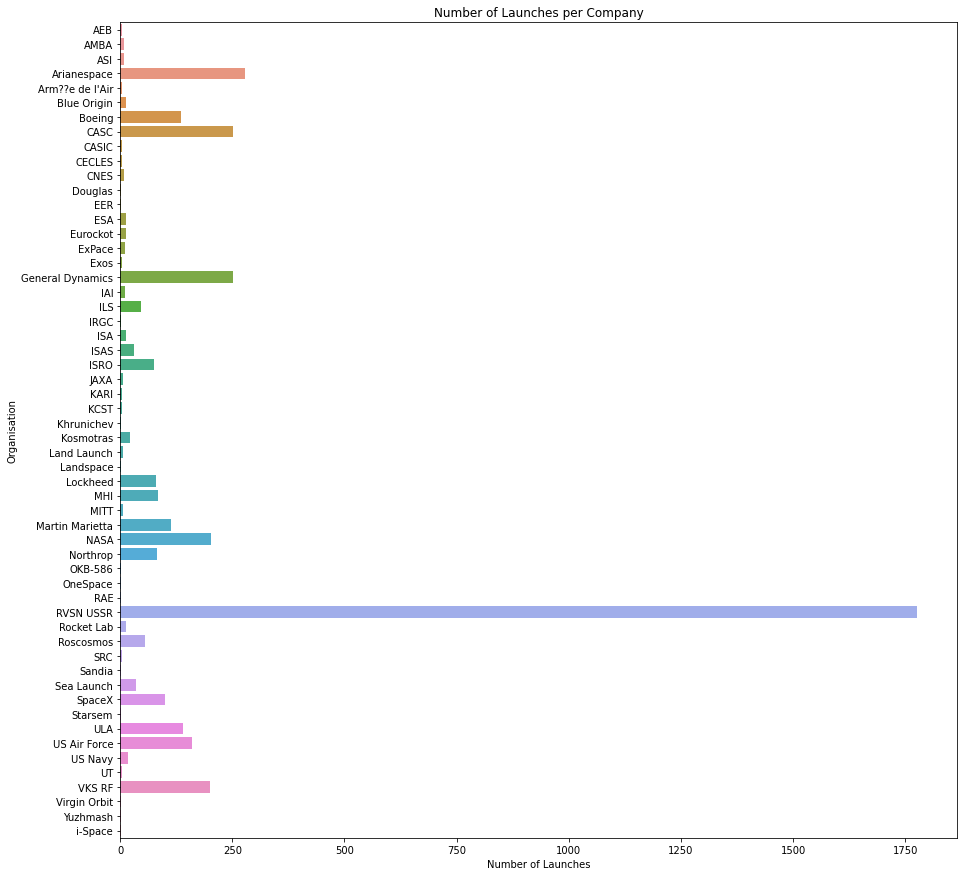

In [ ]:
from seaborn.utils import axlabel
by_company = clean_df.groupby(['Organisation'], as_index=False).count()

y = by_company.Organisation
x = by_company.Location

f, ax = plt.subplots(figsize=(15, 15))
sns.barplot(x=x, y=y, data=by_company).set(title='Number of Launches per Company', xlabel='Number of Launches')

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [ ]:
active = clean_df[clean_df['Rocket_Status'] == 'StatusActive'].count()
inactive = clean_df[clean_df['Rocket_Status'] == 'StatusRetired	'].count()
clean_df.groupby(['Rocket_Status'], as_index=False).count()


,Rocket_Status,Organisation,Location,Date,Detail,Price,Mission_Status
0,StatusActive,790,790,790,790,586,790
1,StatusRetired,3534,3534,3534,3534,378,3534


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
success = clean_df[clean_df['Mission_Status'] == 'Success'].count()
failure = clean_df[clean_df['Mission_Status'] == 'Failure'].count()
failure

Organisation      339
Location          339
Date              339
Detail            339
Rocket_Status     339
Price              36
Mission_Status    339
dtype: int64

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


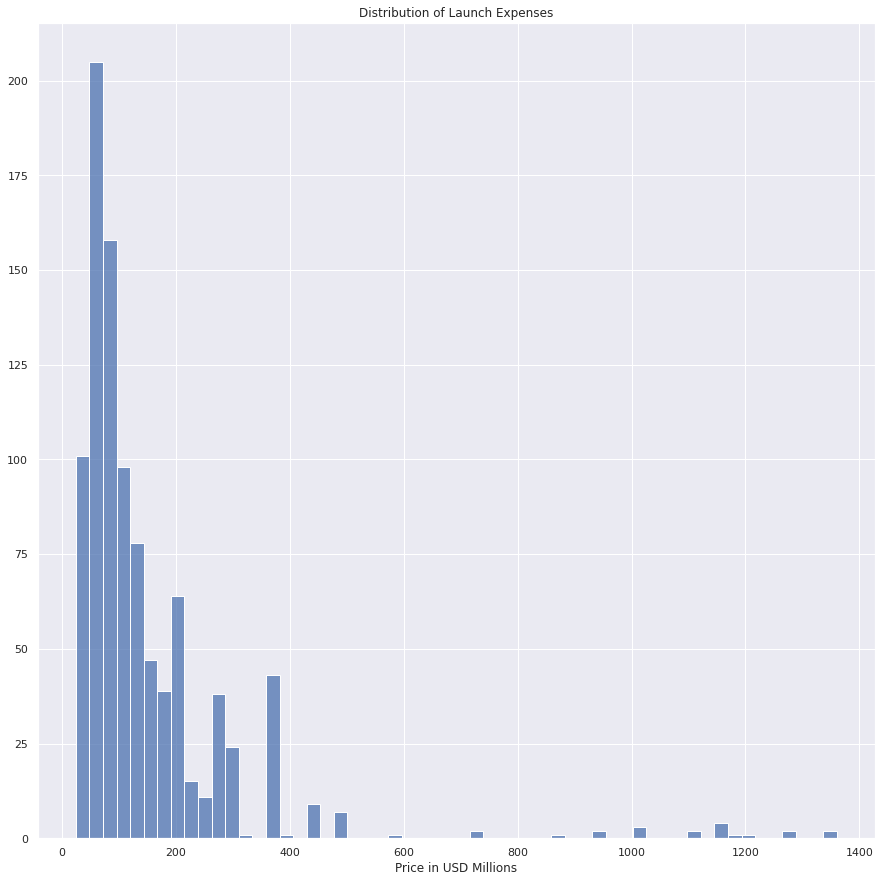

In [ ]:
a = clean_df.dropna()
ap = a[["Organisation", "Price"]]

ap.Price = a.Price.replace(to_replace = ',', value= '', regex=True, inplace=True)
ap.Price = a.Price.astype(float)
price = ap.Price.rolling(5).mean()
price
sns.histplot(data = price).set(title='Distribution of Launch Expenses', ylabel='', xlabel='Price in USD Millions')
sns.set(rc = {'figure.figsize':(15,15)})

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

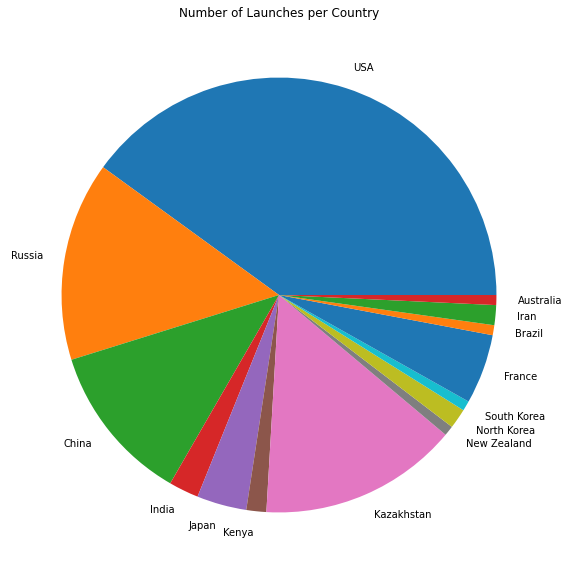

In [ ]:
dt = clean_df.groupby(['Location'], as_index=False).count()

USA= [row['Location'] for index, row in dt.iterrows()   if 'USA' in row['Location'] or 'New Mexico' in row['Location'] or 'Pacific Missile Range Facility' in row['Location'] or 'Gran Canaria' in row['Location']]
Russia = [row['Location'] for index, row in dt.iterrows() if "Russia" in row['Location'] or "Barents Sea" in row['Location']]
China =[row['Location'] for index, row in dt.iterrows() if "China" in row['Location'] or "Yellow Sea" in row['Location']]    
India =[row['Location'] for index, row in dt.iterrows() if "India" in row['Location']] 
Japan = [row['Location'] for index, row in dt.iterrows() if "Japan" in row['Location']] 
Kenya = [row['Location'] for index, row in dt.iterrows() if "Kenya" in row['Location']] 
Kazakhstan = [row['Location'] for index, row in dt.iterrows() if "Kazakhstan" in row['Location']] 
New_Zealand= [row['Location'] for index, row in dt.iterrows() if "New Zealand" in row['Location']] 
North_Korea = [row['Location'] for index, row in dt.iterrows() if "North Korea" in row['Location']] 
South_Korea = [row['Location'] for index, row in dt.iterrows() if "South Korea" in row['Location']] 
France = [row['Location'] for index, row in dt.iterrows() if "France" in row['Location']]
Brazil = [row['Location'] for index, row in dt.iterrows() if "Brazil" in row['Location']]
Iran = [row['Location'] for index, row in dt.iterrows() if "Iran" in row['Location'] or "Shahrud Missile Test Site" in row['Location']]
Australia = [row['Location'] for index, row in dt.iterrows() if "Australia" in row['Location']]
total = [row['Location'] for index, row in dt.iterrows()]

labels = 'USA', 'Russia', 'China', 'India', 'Japan', 'Kenya', 'Kazakhstan', 'New Zealand', 'North Korea', 'South Korea', 'France', 'Brazil', 'Iran', 'Australia'
sizes = [len(USA), len(Russia), len(China), len(India), len(Japan), len(Kenya), len(Kazakhstan), len(New_Zealand), len(North_Korea), len(South_Korea), len(France), len(Brazil),len(Iran), len(Australia)]
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(sizes, labels = labels)
plt.title('Number of Launches per Country')
plt.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
a = clean_df.dropna()
ap = a[["Organisation", "Price"]]

ap.Price = a.Price.replace(to_replace = ',', value= '', regex=True, inplace=True)
ap.Price = a.Price.astype(float)
ap.groupby('Organisation', as_index=False).agg('sum')



/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Organisation,Price
0,Arianespace,"16,345.00"
1,Boeing,"1,241.00"
2,CASC,"6,340.26"
3,EER,20.00
4,ESA,37.00
5,Eurockot,543.40
6,ExPace,28.30
7,ILS,"1,320.00"
8,ISRO,"2,177.00"
9,JAXA,168.00


# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
a = clean_df.dropna()
df3= a[["Organisation", "Price", "Date"]]
df3.groupby(['Organisation', 'Date']).agg('sum')

Price
Organisation Date                             
Arianespace  Fri Apr 18, 2008 22:17 UTC  200.0
             Fri Apr 22, 2011 21:37 UTC  200.0
             Fri Aug 11, 2006 22:15 UTC  200.0
             Fri Aug 21, 2009 22:09 UTC  200.0
             Fri Dec 08, 2006 22:08 UTC  200.0
...                                        ...
VKS RF       Wed Dec 25, 2013 00:31 UTC   41.8
             Wed Sep 08, 2010 03:30 UTC   41.8
             Wed Sep 11, 2013 23:23 UTC   41.8
             Wed Sep 23, 2015 21:59 UTC   41.8
Virgin Orbit Mon May 25, 2020 19:50 UTC   12.0

[963 rows x 1 columns]

# Chart the Number of Launches per Year

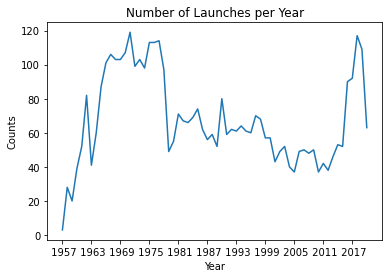

In [ ]:
df4= clean_df.copy()
Year = [row['Date'][11:16] for index, row in df4.iterrows()]
df4['Year'] = Year
df4
by_year = df4.groupby('Year', as_index=False).count()
fig, ax= plt.subplots()
ax.plot(by_year['Year'], by_year['Organisation'])
ax.set_xlabel('Year')
ax.set_ylabel('Counts')
plt.title('Number of Launches per Year')
ax.set_xticks(ax.get_xticks()[::6])

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

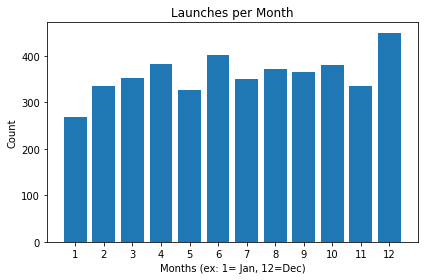

In [ ]:
df5= clean_df.copy()
month = [row['Date'][4:7] for index, row in df5.iterrows()]
df5["Month"] = month
df5.Month = pd.to_datetime(df5.Month, format= "%b").dt.month
df5

by_month = df5.groupby('Month', as_index= False).count()
by_month

fig, ax = plt.subplots()
ax.bar(by_month.Month, by_month.Rocket_Status)
ax.set_xlabel('Months (ex: 1= Jan, 12=Dec)')
ax.set_ylabel('Count')
ax.set_title('Launches per Month')
ax.set_xticks(by_month.Month)
fig.tight_layout()
plt.show()

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

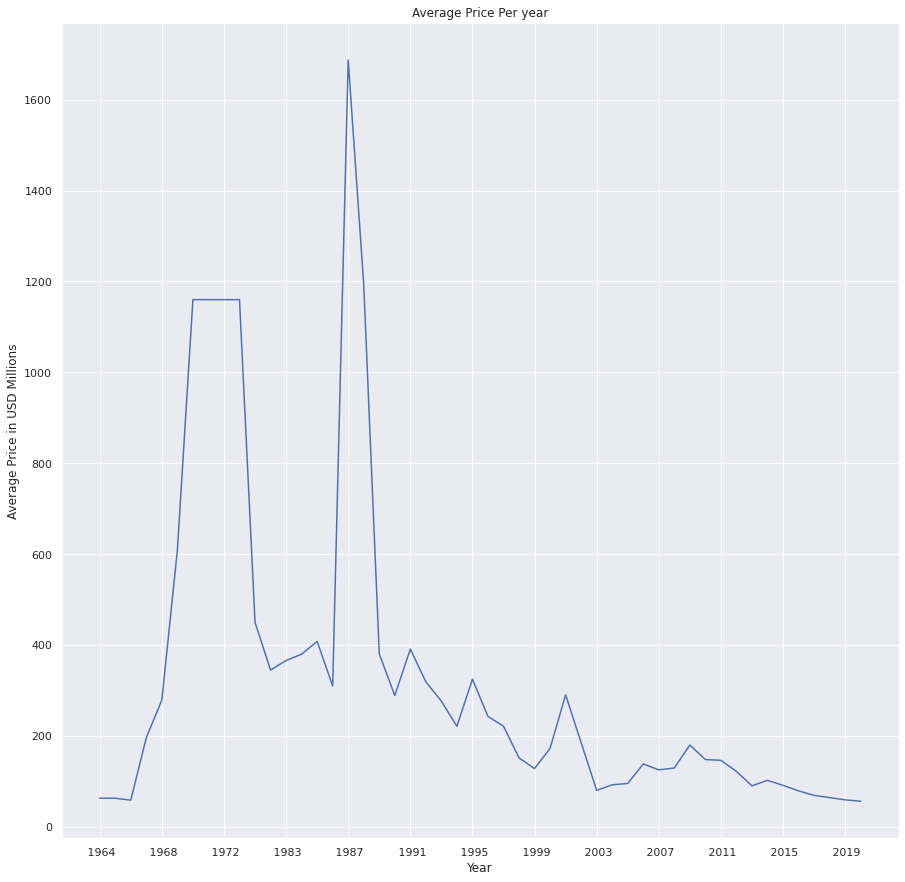

In [ ]:
a = clean_df.dropna()
overtime = a[["Date", "Price"]]
Year = [row['Date'][11:16] for index, row in a.iterrows()]
overtime['Year'] = Year
overtime.drop(['Date'],axis=1)
overtime.Price = a.Price.replace(to_replace = ',', value= '', regex=True, inplace=True)
overtime.Price = a.Price.astype(float)
overtime_new = overtime.groupby('Year', as_index=False).agg('mean')
fig, ax= plt.subplots()
ax.plot(overtime_new['Year'], overtime_new['Price'])
ax.set_xlabel('Year')
ax.set_ylabel('Average Price in USD Millions')
plt.title('Average Price Per year')
ax.set_xticks(ax.get_xticks()[::4])